# Exercise: Victorian Car Crash Severity

ACTL3143 & ACTL5111 Deep Learning for Actuaries

Your task is to predict whether a specific car crash will be a high
severity or a low severity incident. You will use a dataset of car
crashes in Victoria where the police were called to assist. The dataset
is available [here](https://laub.au/ai/data/ACCIDENT.csv) ([original
source](https://discover.data.vic.gov.au/dataset/crash-stats-data-extract)).

<figure>
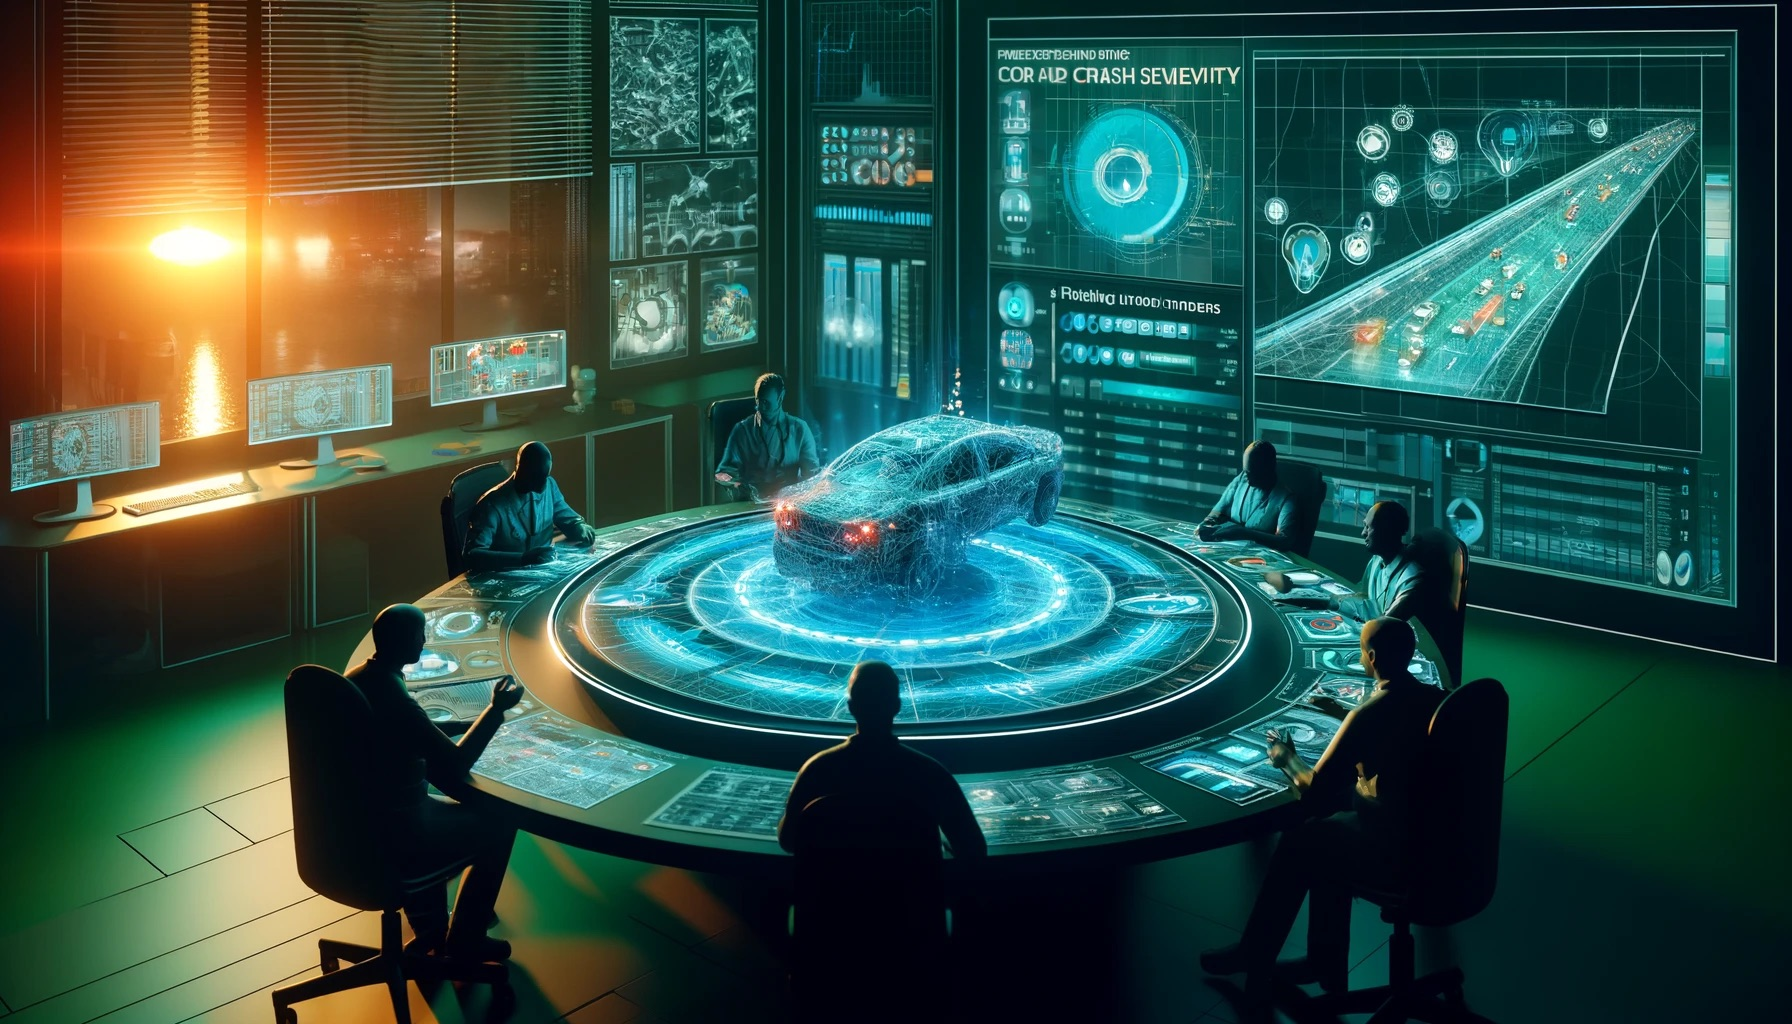
<figcaption aria-hidden="true">DALL-E’s rendition of this Victorian car
crash severity classification task.</figcaption>
</figure>

The network must use entity embedding for at least one of the
categorical variables (e.g. the `DCA_CODE`), and train on a mix of both
categorical and numerical features. The target variable is the binary
outcome that severity is \> 2. Report on the value of the accuracy of
your classifier and give a confusion matrix.

Questions:

-   How did you preprocess your variables?
-   What neural network architecture did you use?
-   Did you try multiple options for the embedding dimension? Did any
    work better than others? (E.g. plot x = embedding dimension against
    y = validation accuracy)
-   If your entity embedding dimension was low (1, 2 or 3) can you make
    a scatterplot of the categories & their learned embeddings?

# The data

Start by reading the [data
dictionary](https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/RCIS%20Documents/Metadata%20-%20Victoria%20Road%20Crash%20data.pdf)
for the dataset.

In [1]:
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

set_config(transform_output="pandas")

In [2]:
df_raw = pd.read_csv("https://laub.au/ai/data/ACCIDENT.csv", low_memory=False)
df_raw

203708 rows × 28 columns

# Preprocessing

In [3]:
# Drop observations which have categorical variables which are very rare (< 10 obs in the dataset)
# This is a crude solution / surely can be improved.
df_simple = df_raw.copy()

sparse_categories = ["DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]

for cat in sparse_categories:
    df_simple = df_simple[df_simple[cat].map(df_simple[cat].value_counts()) > 10]    

df_simple

203692 rows × 28 columns

In [4]:
drop = ["ACCIDENT_NO", 'ACCIDENTDATE', 'ACCIDENTTIME', "Accident Type Desc", "Day Week Description", "DCA Description",
        "DIRECTORY", "EDITION", "PAGE", "GRID_REFERENCE_X", "GRID_REFERENCE_Y",
        "Light Condition Desc", "NODE_ID", "Road Geometry Desc"]

df = df_simple.drop(drop, axis=1)

categorical_variables = ["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]
numerical_variables = [col for col in df.columns if col not in categorical_variables]

In [5]:
print(categorical_variables)
print(numerical_variables)

['ACCIDENT_TYPE', 'DCA_CODE', 'LIGHT_CONDITION', 'ROAD_GEOMETRY']
['DAY_OF_WEEK', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ', 'POLICE_ATTEND', 'SEVERITY', 'SPEED_ZONE']

In [6]:
# Print the number of unique categories
for cat in categorical_variables:
    print(f"{cat}: {df[cat].nunique()}")

ACCIDENT_TYPE: 9
DCA_CODE: 80
LIGHT_CONDITION: 7
ROAD_GEOMETRY: 7

In [7]:
# Print out the unique values for each categorical variable and their descriptions
categorical_descriptions = ["Accident Type Desc", "DCA Description", "Light Condition Desc", "Road Geometry Desc"]

for cat, desc in zip(categorical_variables, categorical_descriptions):
    df_cat = df_raw[[cat, desc]].drop_duplicates().sort_values(by=[cat]).reset_index(drop=True)
    display(df_cat)
    print()

81 rows × 2 columns

In [8]:
target = (df["SEVERITY"] > 2)
features = df.drop("SEVERITY", axis=1)

# Classification task

This is for you to complete.